# Performance comparison of 1D wave propagation implementations
*by [Alan Richardson](mailto:alan@ausargeo.com) ([Ausar Geophysical](https://www.ausargeo.com))*

## Summary
Python is often the preferred language for modern scientific codes, due to its readability, ease of modification, and large collection of tools such as plotting libraries. It is quite slow, however, and so numerically intensive portions of codes are often written in another language such as C. In this notebook, I try to find the best way of getting high performance from a 1D wave propagator that I call from Python. I compare regular Python, Numba, and several C and Fortran implementations. For O(10) time steps, Numba is O(10) times faster than regular Python, and C and Fortran are about O(1000) times faster, while for O(1000) time steps, the speed-ups are O(100) and O(10000), respectively. Numba is significantly easier than C or Fortran, but for this application the performance gain of switching to C or Fortran seems to be worth the effort.

## Introduction

Seismic imaging and inversion methods, such as [FWI](http://wiki.seg.org/wiki/Full_waveform_inversion) and [RTM](http://wiki.seg.org/wiki/Reverse_time_migration), are still active areas of research. Researchers in academia and industry working in these areas spend much of their time modifying codes to try out new ideas. Their effectiveness can thus be improved by using a language well suited to rapid development, such as Python.

When these algorithms are implemented in well-written Python, everyone in the research group, including the summer interns, can quickly understand the code and feel comfortable modifying it. You wouldn't want to implement everything in Python though, or the time-savings of a nice language will be erased by waiting for the code to run. In RTM and FWI, much of the runtime is consumed by the wave propagator. Writing the propagator in a high performance language, and the rest of the code in Python, is thus a good compromise.

In the Python package that accompanies this notebook, [wave_1d_fd_perf](https://github.com/ar4/wave_1d_fd_perf), I have two regular Python, four Numba, three Fortran, and ten C versions of a 1D wave propagator. It is a second order in time, eigth order in space finite difference propagator, using conventional finite difference coefficients. To keep the code simple, I do not have absorbing boundaries. The propagator is mathematically the same in every case, it is only the language, implementation, or compilation options that vary. All of the propagators are called from Python, and the timing results include the cost of this function call.

## Implementations

In this section I briefly describe the different implementations.

### Python v1

### Python v2

### Numba v1

### Numba v2
### Numba v3
### Numba v4
### Fortran v1
### Fortran v2
### Fortran v3
### C v1
### C v2
### C v3
### C v4
### C v5

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
#times=wave_1d_fd_perf.run_timing.run_timing_num_steps()
#times.to_csv('times_num_steps.csv')
times = pd.read_csv('times_num_steps.csv')

version
C v1 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -O2)                     Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -Ofast)                  Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -Ofast, autoparallel)    Axes(0.125,0.125;0.775x0.775)
C v3 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v4 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v5 (gcc, -O2)                     Axes(0.125,0.125;0.775x0.775)
C v5 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v5 (gcc, -Ofast)                  Axes(0.125,0.125;0.775x0.775)
Fortran v1                          Axes(0.125,0.125;0.775x0.775)
Fortran v2                          Axes(0.125,0.125;0.775x0.775)
Fortran v3                          Axes(0.125,0.125;0.775x0.775)
Numba v1                            Axes(0.125,0.125;0.775x0.775)
Numba v2                            Axes(0.125,0.125;0.775x0.775)
Nu

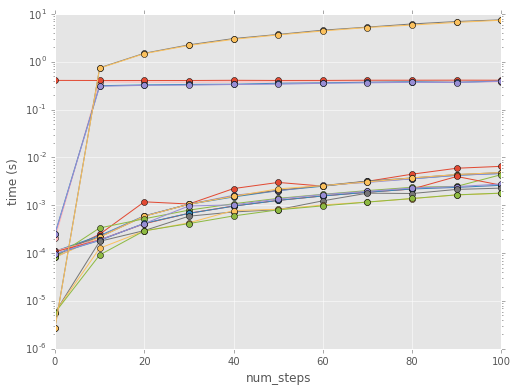

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yscale('log')
ax.set_ylabel('time (s)')
times.groupby('version').plot(x='num_steps', y='time', ax=ax, style='o-', legend=False)

In [4]:
times100 = times.loc[times['num_steps'] == 100].copy()
times100['speedup']=(times100.loc[times100['version']=='Python v1']['time'].values)/times100['time']

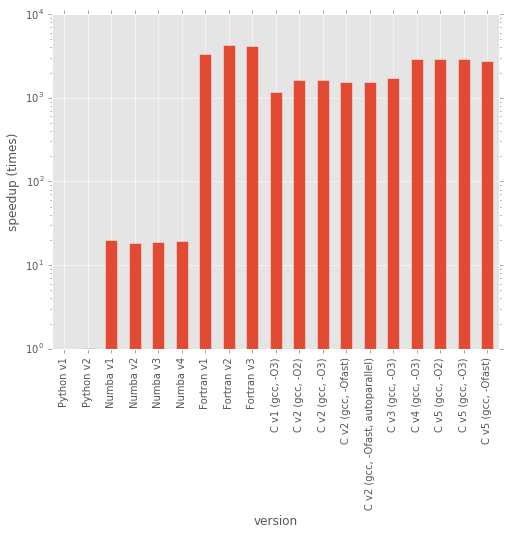

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel('speedup (times)')
times100.plot(kind='bar', x='version', y='speedup', logy=True, legend=False, ax=ax)

In [6]:
#times=wave_1d_fd_perf.run_timing.run_timing_model_size()
#times.to_csv('times_model_size.csv')
times = pd.read_csv('times_model_size.csv')

version
C v1 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -O2)                     Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -Ofast)                  Axes(0.125,0.125;0.775x0.775)
C v2 (gcc, -Ofast, autoparallel)    Axes(0.125,0.125;0.775x0.775)
C v3 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v4 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v5 (gcc, -O2)                     Axes(0.125,0.125;0.775x0.775)
C v5 (gcc, -O3)                     Axes(0.125,0.125;0.775x0.775)
C v5 (gcc, -Ofast)                  Axes(0.125,0.125;0.775x0.775)
Fortran v1                          Axes(0.125,0.125;0.775x0.775)
Fortran v2                          Axes(0.125,0.125;0.775x0.775)
Fortran v3                          Axes(0.125,0.125;0.775x0.775)
Numba v1                            Axes(0.125,0.125;0.775x0.775)
Numba v2                            Axes(0.125,0.125;0.775x0.775)
Nu

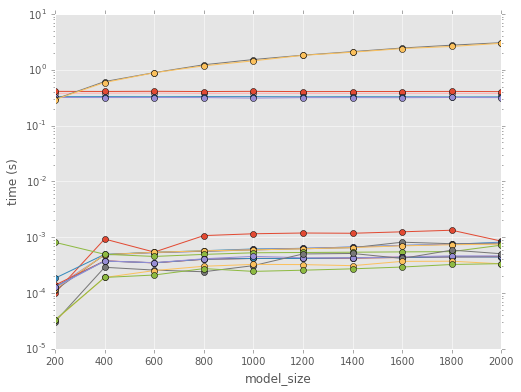

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_yscale('log')
ax.set_ylabel('time (s)')
times.groupby('version').plot(x='model_size', y='time', ax=ax, style='o-', legend=False)

In [8]:
times2000 = times.loc[times['model_size'] == 2000].copy()
times2000['speedup']=(times2000.loc[times2000['version']=='Python v1']['time'].values)/times2000['time']

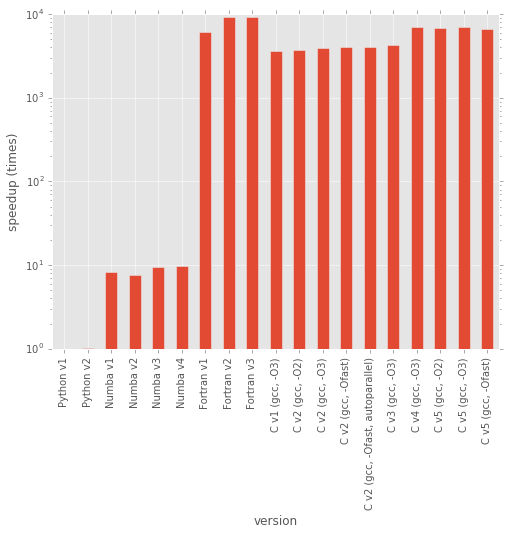

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel('speedup (times)')
times2000.plot(kind='bar', x='version', y='speedup', logy=True, legend=False, ax=ax)

In [10]:
#times=wave_1d_fd_perf.run_timing.run_timing_model_size(num_steps=2000, model_sizes=[2000])
#times.to_csv('times_2000_2000.csv')
times=pd.read_csv('times_2000_2000.csv')

In [11]:
times['speedup']=(times.loc[times['version']=='Python v1']['time'].values)/times['time']
times['speedup']

0         1.000000
1         1.013066
2       612.302845
3       578.617118
4       135.504376
5       151.053159
6     17063.319928
7     17065.007585
8     16674.718212
9      7099.144048
10     7316.567432
11     7310.137436
12     8728.638168
13     8367.008759
14    22321.362606
15    24328.214067
16    24423.422455
17    24264.467073
18    24503.309612
Name: speedup, dtype: float64

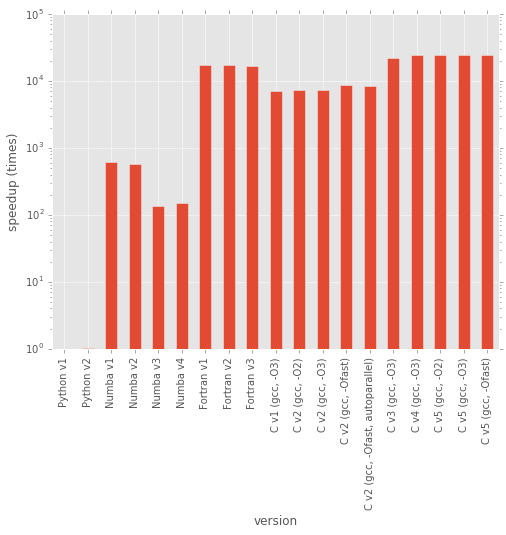

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_ylabel('speedup (times)')
times.plot(kind='bar', x='version', y='speedup', logy=True, legend=False, ax=ax)